# Titanic Survival
## Family vs. Wealth

In this project, we'll be looking at what would have improved your chances of survival on the Titanic. Specifically, we'll be looking at whether it would have been more beneficial to have family onboard, or to have money in the bank.

My reason for looking at the data from this perspective, is that I can see a case for both before looking into the data: Being wealthy might have improved your chances of being helped by the crew, but having family on board might have made you part of a group with a strong desire to survive for one another. But these are just musings without looking at the data!

First, we'll import a few libraries that will make our lives easier.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use('seaborn-muted')

Then we'll go ahead and import the data.

In [2]:
titanic_data = pd.read_csv('titanic-data.csv')

Now that we have the data imported, let's take a look at the first few rows to see whether we have the data that we need to answer the questions.

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Great! It looks like we've got enough information to answer our question.

As we can see, there are 12 columns:

###### PassengerId
This is a unique identifier for each passenger.

###### Survived
This is a boolean with a value of 1 for "survived" and a 0 for "did not survive".

###### Pclass
This is a number from 1 to three, indicating whether the passenger was in first, second, or third class. We're interested in this as a determining factor in the wealth of the passenger.

###### Name
This is the full name of the passenger.

###### Sex
If this isn't obvious, please speak to your parents.

###### Age
The age of the passenger in years. If the age was lower than 1 year, it is represented as a fraction. If the age was a guess, it is followed by a .5

###### SibSp
This refers to the number of siblings or spouses on board. The data defines these relations as follows: Siblings are brother, sister, stepbrother, or stepsister. Spouses are husband or wife, with mistresses and fiancés excluded. This entry is particularly interesting from a family perspective.

###### Parch
This refers to the number of parents or children onboard with the dataset defining these relations as follows: Parents are mothers or fathers. Children are daughters, sons, stepdaughters, or stepsons. There are children with no parents listed, this is because they were travelling with a nanny. I'm a bit dissapointed that all of this information is bundled together, particularly for the comparison that we're hoping to make.

Before we go on, let's get an overall look at the data

In [4]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Firstly, we can see that this sample contains 891 passengers, which means that we don't have data for every passenger onboard. There were 1317 passengers on the titanic, excluding crew.

It looks like there's quite a bit of data missing for Age, but we're not going to worry about cleaning that out, as it's not part of our hypothesis. We will, however, add some fields as a later stage to make our life easier.

If we look at the mean for the survived column, we see that only 38 percent of this sample survived.

# Working with the Data

It's time to start working with the data. To start with, let's create a few simple pie charts to get a high-level view of where we're going. Before we start, we'll create a helper function to speed things up for the next few pie charts, while also making our code more maintainable.

In [6]:
def plot_survival_pie(survived,deceased, label, ax, columns):
    survival_series = pd.Series([survived, deceased],index=['Survived', 'Deceased'])
    survival_series.plot.pie(ax=ax, label=label, figsize=(5* columns,5), colormap='coolwarm', autopct='%1.1f%%')

def plot_survival_pie_by_len(survived,deceased, label, ax, columns):
    survival_series = pd.Series([len(survived), len(deceased)],index=['Survived', 'Deceased'])
    survival_series.plot.pie(ax=ax, label=label, figsize=(5* columns,5), colormap='coolwarm', autopct='%1.1f%%')

## Helpful Subsets

I think that subsets for survived and deceased will help us going forward, so let's create them:

In [7]:
survived = titanic_data[titanic_data.Survived == 1]
deceased = titanic_data[titanic_data.Survived == 0]

# Survival Rates

## Total Survival

Our first pie chart shows the number of passengers who survived, vs those who didn't. You'll notice that the survival percentage is the same as our mean for survival, this is a nice confirmation that our mean for boolean field is going to work for us going forward.

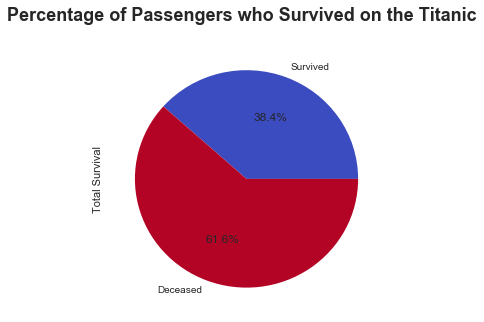

In [8]:
plt.figure().suptitle('Percentage of Passengers who Survived on the Titanic', fontsize=18, fontweight='bold')
plot_survival_pie_by_len(survived,deceased, 'Total Survival', None, 1)

## Survival by Passenger Class

Next we'll group passengers by passenger class and look at the survival rates of each class.

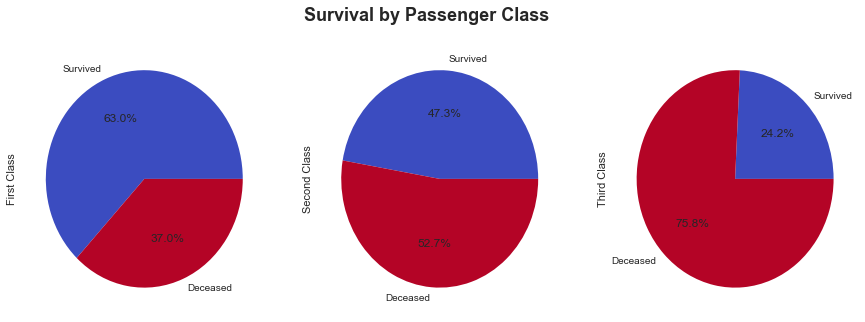

In [16]:
by_classes_survival = survived.groupby('Pclass').count()['Survived']
by_classes_deceased = deceased.groupby('Pclass').count()['Survived']
# Counting the survival column is arbitary, we could have used any column here

fig, axes = plt.subplots(nrows=1, ncols=3)
ax0, ax1, ax2 = axes.flatten()

fig.suptitle('Survival by Passenger Class', fontsize=18, fontweight='bold')

plot_survival_pie(by_classes_survival.loc[1],by_classes_deceased.loc[1], 'First Class', ax0,3)
plot_survival_pie(by_classes_survival.loc[2],by_classes_deceased.loc[2], 'Second Class', ax1,3)
plot_survival_pie(by_classes_survival.loc[3],by_classes_deceased.loc[3], 'Third Class', ax2,3)

## Survival By Family Status

In order to easily tell whether a passenger has family onboard, let's go ahead and create a boolean for whether or not they do. This boolean will be the result of whether the passenger has an entry above zero in either the Parch or the SibSp column. We'll create the column then take a look at what the new dataframe looks like.

In [17]:
parch_col = titanic_data['Parch']
sibsp_col = titanic_data['SibSp']

has_parch = parch_col > 0
has_sibsp = sibsp_col > 0

has_family = has_parch | has_sibsp

titanic_data['has_family'] = has_family

titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,has_family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False


Now we'll update our survived and deceased subsets so that they have the has_family column

In [18]:
survived = titanic_data[titanic_data.Survived == 1]
deceased = titanic_data[titanic_data.Survived == 0]

### Survival of those with family

We're ready to start with a high level intuitive look at how having family onboard affects your chance of survival

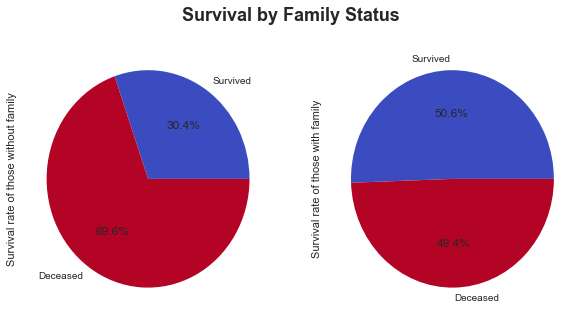

In [19]:
has_family_survived = survived[survived.has_family]
has_family_not_survived = deceased[deceased.has_family]

no_family_survived = survived[survived.has_family == False]
no_family_deceased = deceased[deceased.has_family == False]

fig, axes = plt.subplots(nrows=1, ncols=2)
ax0, ax1 = axes.flatten()

fig.suptitle('Survival by Family Status', fontsize=18, fontweight='bold')

plot_survival_pie_by_len(no_family_survived,no_family_deceased,'Survival rate of those without family', ax0,2)
plot_survival_pie_by_len(has_family_survived,has_family_not_survived,'Survival rate of those with family', ax1,2)

# A closer look with normalized data

The charts above have helped us gain a broad overview of survival rates, but they're not enough to draw any rigorous conclusions. For that, we'll need to dive deeper into statistics.

We'll start of storing the mean and standard deviation for survival.

In [20]:
mean_survived = titanic_data.mean()['Survived']
std_survived = titanic_data.std(ddof=0)['Survived']

print mean_survived
print std_survived

0.383838383838
0.486319317867


Then we'll create a helper function to normalize some of the data that we're going to work with.

In [21]:
def normalize(mean):
    return (mean - mean_survived) / std_survived

Now we're ready to take a look at how many standard deviations from the mean survival rate each passenger class was.

Pclass
1    0.505411
2    0.182982
3   -0.290911
Name: Survived, dtype: float64


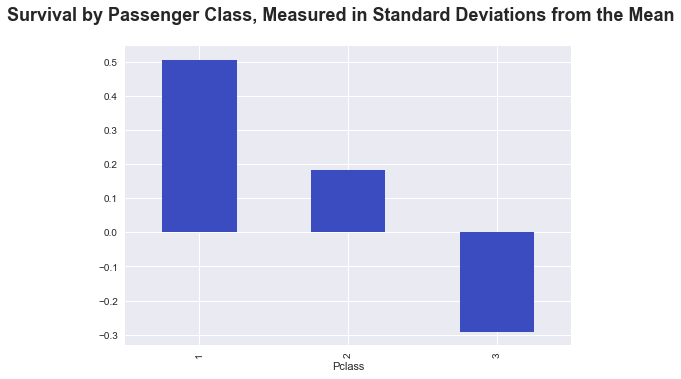

In [23]:
by_classes = titanic_data.groupby('Pclass').mean()['Survived'].apply(normalize)
print by_classes
plt.figure().suptitle('Survival by Passenger Class, Measured in Standard Deviations from the Mean', fontsize=18, fontweight='bold')
by_classes.plot.bar(colormap='coolwarm')

So far first class is looking pretty good, with survival rates 0.5 standard deviations above the norm. By comparison, third class is looking quite bleak, with survival rates 0.29 standart deviations below the norm. Having 3 bins as a result of our operational definition of wealth, however, still won't help us draw rigorous statistical conclusions. We'll use a different operational definition soon.

Befrore that, let's look at survival rates for those with family, and those without.

has_family
False   -0.165118
True     0.250476
Name: Survived, dtype: float64


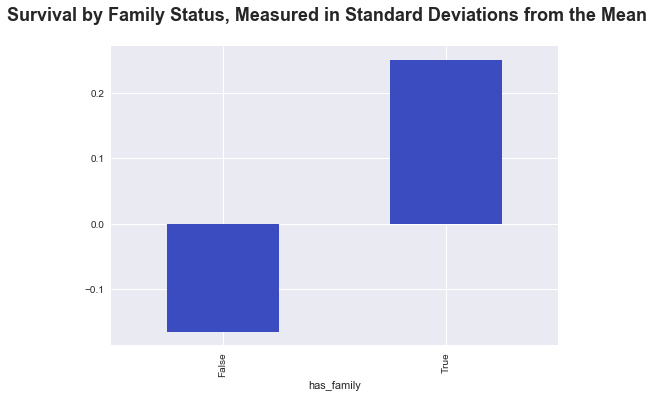

In [24]:
by_family = titanic_data.groupby('has_family').mean()['Survived'].apply(normalize)

print by_family
plt.figure().suptitle('Survival by Family Status, Measured in Standard Deviations from the Mean', fontsize=18, fontweight='bold')
by_family.plot.bar(colormap='coolwarm')

Having family onboard is looking a lot better than not having family onboard, but we've still only got two bins. Let's look at different measurement for family, at the same time looking at fare price as an operational definition for wealth.

This next chart gives us a broad overview of what the fares look likeby number of passengers who paid that fare.

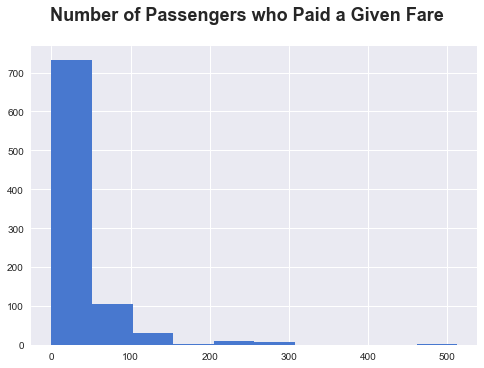

In [30]:
plt.figure().suptitle('Number of Passengers who Paid a Given Fare', fontsize=18, fontweight='bold')
titanic_data['Fare'].hist()

It looks like there are some extreme outliers, but let's still plot this on a scatter plot and see whether there is a correlation between fare price and survival rate. Because survival is a boolean, we're going to need to bin the data and look at normalized means for each of the bins.

Correlation: 
0.600397592692


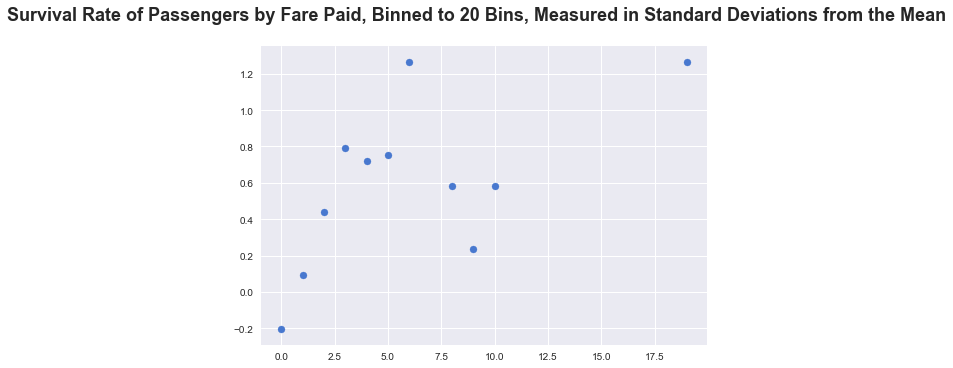

In [32]:
titanic_by_fare = titanic_data.copy()

fare_num_bins = 20


titanic_by_fare['Fare'] = pd.cut(titanic_by_fare['Fare'],fare_num_bins, labels=False)

titanic_by_fare_grouped = titanic_by_fare.groupby('Fare')
titanic_by_fare_normalized = titanic_by_fare_grouped['Survived'].mean().apply(normalize)

fare_correlation = pd.DataFrame({'fare': titanic_by_fare_normalized.index.values,
                                  'survived': titanic_by_fare_normalized.values})

print 'Correlation: '
print fare_correlation.corr(method='pearson').loc['fare','survived']

plt.figure().suptitle('Survival Rate of Passengers by Fare Paid, Binned to 20 Bins, Measured in Standard Deviations from the Mean', fontsize=18, fontweight='bold')
plt.scatter(titanic_by_fare_normalized.index.values, titanic_by_fare_normalized.values)


Thta's a moderate correlation. Let's remove the outliers and see whether this looks any different.

In [34]:
#titanic_data.boxplot(column="Fare")
titanic_fare_25 = titanic_data['Fare'].quantile(0.25)
titanic_fare_75 = titanic_data['Fare'].quantile(0.75)
titanic_fare_no_outliers = titanic_data[titanic_data.Fare >= titanic_fare_25]
titanic_fare_no_outliers = titanic_fare_no_outliers[titanic_fare_no_outliers.Fare <= titanic_fare_75]

Correlation: 
0.19492056477


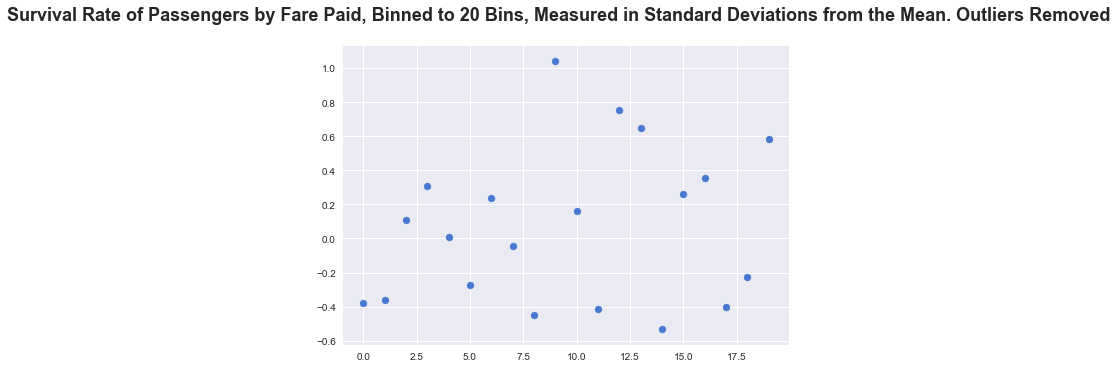

In [36]:
titanic_fare_binned = titanic_fare_no_outliers.copy()
titanic_fare_binned['Fare'] = pd.cut(titanic_fare_binned['Fare'],fare_num_bins, labels=False)

titanic_fare_binned_grouped = titanic_fare_binned.groupby('Fare')
titanic_fare_binned_normalized = titanic_fare_binned_grouped['Survived'].mean().apply(normalize)

fare_correlation = pd.DataFrame({'fare': titanic_fare_binned_normalized.index.values,
                                  'survived': titanic_fare_binned_normalized.values})

print 'Correlation: '
print fare_correlation.corr(method='pearson').loc['fare','survived']
plt.figure().suptitle('Survival Rate of Passengers by Fare Paid, Binned to 20 Bins, Measured in Standard Deviations from the Mean. Outliers Removed', fontsize=18, fontweight='bold')
plt.scatter(titanic_fare_binned_normalized.index.values, titanic_fare_binned_normalized.values)

With the outliers removed, we have a more accurate representation, but we've also dropped the correlation to 0.195, which is very weak.

## Family Data by Number of Family

Our next look into family will involve the number of family members that someone has onboard. For this, it will be easiest to create another column with the number of family members onboard.

In [37]:
parch_col = titanic_data['Parch']
sibsp_col = titanic_data['SibSp']

has_parch = parch_col > 0
has_sibsp = sibsp_col > 0

num_family = parch_col + sibsp_col

titanic_data['num_family'] = num_family

titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,has_family,num_family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,True,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,0


Let's go ahead and plot this data before we remove any outliers.

Correlation: 
-0.700326626315


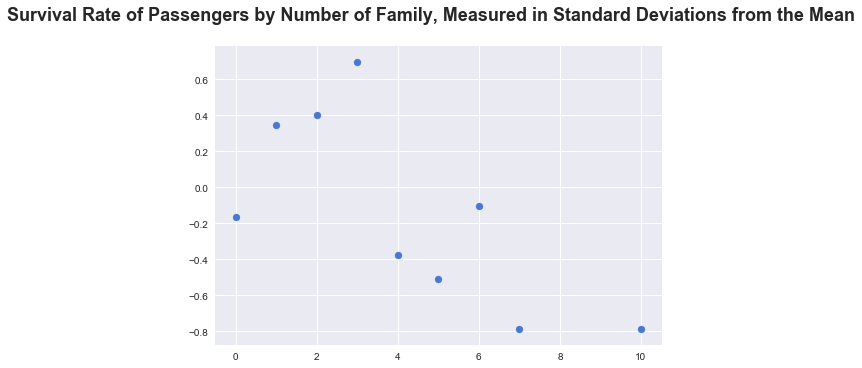

In [39]:
titanic_family = titanic_data.groupby('num_family')
titanic_family_normalized = titanic_family['Survived'].mean().apply(normalize)

family_correlation = pd.DataFrame({'num_family': titanic_family_normalized.index.values,
                                  'survived': titanic_family_normalized.values})

print 'Correlation: '
print family_correlation.corr(method='pearson').loc['num_family', 'survived']
plt.figure().suptitle('Survival Rate of Passengers by Number of Family, Measured in Standard Deviations from the Mean', fontsize=18, fontweight='bold')
plt.scatter(titanic_family_normalized.index.values, titanic_family_normalized.values)

This isn't looking good for family at all, but let's see whether those higher numbers are outliers. Lets' also look at the number of people in those bins to see what sort of influence they might have had.

0.0
1.0
Axes(0.125,0.125;0.775x0.755)


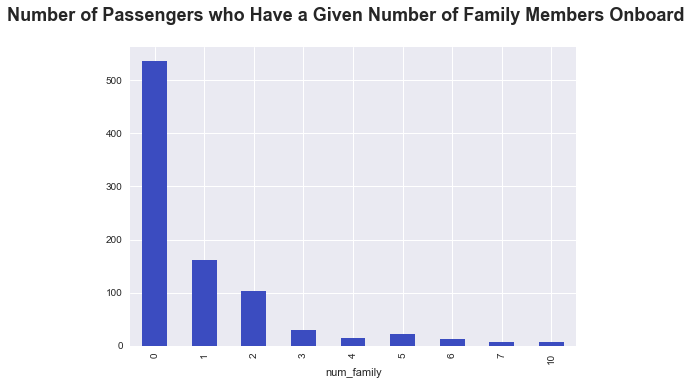

In [44]:
print titanic_data['num_family'].quantile(0.25)
print titanic_data['num_family'].quantile(0.75)
plt.figure().suptitle('Number of Passengers who Have a Given Number of Family Members Onboard', fontsize=18, fontweight='bold')
print titanic_family.count()['Survived'].plot.bar(colormap="coolwarm")

The bins above 2 are definitely outliers! However, we can't do much with with two bins as our interquartile range would suggest. Let's expand the bins to include 2 family members and see what we get.

In [45]:

titanic_family = titanic_data.groupby('num_family')
titanic_family_std = titanic_family['Survived'].mean().apply(normalize)
titanic_family_interquart = titanic_family_std.loc[0:2]


Correlation: 
0.905140839231


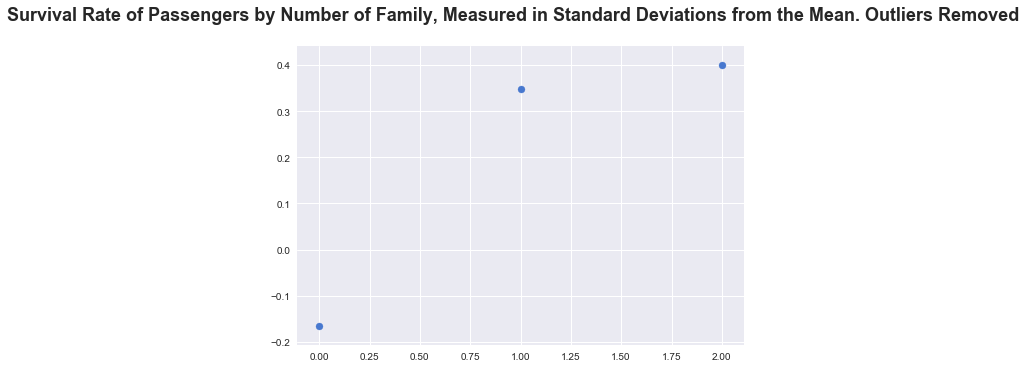

In [46]:
family_correlation = pd.DataFrame({'num_family': titanic_family_interquart.index.values,
                                  'survived': titanic_family_interquart.values})

print 'Correlation: '
print family_correlation.corr(method='pearson').loc['num_family', 'survived']
plt.figure().suptitle('Survival Rate of Passengers by Number of Family, Measured in Standard Deviations from the Mean. Outliers Removed', fontsize=18, fontweight='bold')
plt.scatter(titanic_family_interquart.index.values, titanic_family_interquart.values)

This is by far the strongest correlation that we've seen, and this points to having family onboard as a much stronger prediction for survival than wealth. Of course, we did find better survival rate in first class, so the link might not be causal. I think it's worth looking into the mean number of family by class.

Axes(0.125,0.125;0.775x0.755)


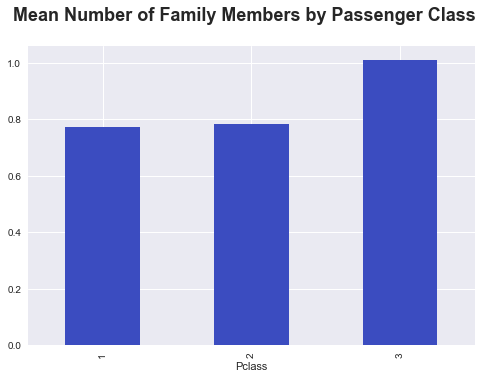

In [48]:
titanic_class_family = titanic_data.groupby('Pclass').mean()['num_family']
plt.figure().suptitle('Mean Number of Family Members by Passenger Class', fontsize=18, fontweight='bold')
print titanic_class_family.plot.bar(colormap="coolwarm")

As we can see, the mean number of family members is actually higher in third class, which had a lower survival rate by class. This helps to support number of family members on board as a better predictor for survival than wealth.

# Conclusion

We've taken a look at family and wealth as determining factors in survival on the Titanic. With family being relatively objective, we needed an operational definition for wealth. We looked at passenger class, as well as fare as operational definitions for wealth.

While the passenger class showed a promising link between wealth and survival, there weren't enough bins to reliably draw up a correlation in the form of Pearson's r. We then looked at fare as an operational definition for wealth. There we had almost too much information, so we removed outliers and binned the results. This helped us discover a very weak correlation of 0.195.

We then moved onto family. In order to get data more granular than simply had family or didn't, we looked at the number of family members that passengers had onboard and removed the upper outliers. We couldn't remove the lower outliers, as these were of the value zero and constituted a large portion of the population. We then discovered a strong corrlation of 0.905 between the number of family members on board and the rate of survival. Passengers with 2 family members on board had a survival rate 0.4 standard deviations above the norm. However, passengers in first class had a survival rate 0.5 standard deviations above the norm.

Looking at class alone, it appears that being in first class would have given you the best chance of survival, but when we look at a broader definition of wealth and a broader definition of family, we found a much stronger correlation between family and survival.

This is a tricky data set to draw conclusions from, but if it were me onboard, I would definitely choose family over money, given the data... being in first class with 2 family members wouldn't hurt either!

## Resources

* http://www.titanicfacts.net/titanic-passengers.html
* https://pandas.pydata.org/pandas-docs/stable/
* https://matplotlib.org
* Udacity Forums